In [1]:
import os
import pandas as pd
import json
import numpy as np

In [2]:
data_path = "/data/ephemeral/home/lee/level2-recsys-movierecommendation-recsys-08-lv3/data/train/"

train_rating = pd.read_csv(os.path.join(data_path, "train_ratings.csv"))

title = pd.read_csv(os.path.join(data_path, "titles.tsv"), sep='\t')

year = pd.read_csv(os.path.join(data_path, "years.tsv"), sep='\t')

director = pd.read_csv(os.path.join(data_path, "directors.tsv"), sep='\t')

genre = pd.read_csv(os.path.join(data_path, "genres.tsv"), sep='\t')

writer = pd.read_csv(os.path.join(data_path, "writers.tsv"), sep='\t')

with open(os.path.join(data_path, "Ml_item2attributes.json"), "r") as file:
    data = json.load(file)

Ml_item2attribute = pd.DataFrame.from_dict(data, orient='index')

### train_rating

In [3]:
print(train_rating.info())
print("*****************************************************************")
print(train_rating.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB
None
*****************************************************************
   user  item        time
0    11  4643  1230782529
1    11   170  1230782534
2    11   531  1230782539
3    11   616  1230782542
4    11  2140  1230782563


In [4]:
num_train_users = train_rating['user'].nunique()
num_train_items = train_rating['item'].nunique()

print(num_train_users)
print(num_train_items)

31360
6807


In [5]:
print(train_rating.isnull().sum())

user    0
item    0
time    0
dtype: int64


In [6]:
each_user_item = train_rating.groupby('user')['item'].size()

print(each_user_item.head())

user
11    376
14    180
18     77
25     91
31    154
Name: item, dtype: int64


In [7]:
print(each_user_item.describe())

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: item, dtype: float64


In [8]:
min_time = train_rating['time'].min()
max_time = train_rating['time'].max()
print(max_time)
print(min_time)

1427781052
1113220585


In [9]:
from datetime import datetime
import matplotlib.pyplot as plt

In [10]:
fix_min_time = datetime.fromtimestamp(min_time)
fix_max_time = datetime.fromtimestamp(max_time)
print(fix_min_time)
print(fix_max_time)
# 유닉스 타임스탬프(Unix Timestamp)를 사람이 읽을 수 있는 날짜와 시간(datetime 객체)으로 변환

2005-04-11 11:56:25
2015-03-31 05:50:52


In [11]:
check_time_sort = train_rating.groupby('user')['time'].apply(lambda x: x.is_monotonic_increasing).all()
print(check_time_sort)

True


In [12]:
train_rating_check = train_rating.copy()
train_rating_check['timestamp'] = pd.to_datetime(train_rating_check['time'], unit='s')
train_rating_check['user_year'] = train_rating_check['timestamp'].dt.year
train_rating_check['user_month'] = train_rating_check['timestamp'].dt.month
train_rating_check['user_day_of_week'] = train_rating_check['timestamp'].dt.dayofweek
train_rating_check['user_hour'] = train_rating_check['timestamp'].dt.hour

print(train_rating_check.head(10))

   user  item        time           timestamp  user_year  user_month  \
0    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
1    11   170  1230782534 2009-01-01 04:02:14       2009           1   
2    11   531  1230782539 2009-01-01 04:02:19       2009           1   
3    11   616  1230782542 2009-01-01 04:02:22       2009           1   
4    11  2140  1230782563 2009-01-01 04:02:43       2009           1   
5    11  2722  1230782583 2009-01-01 04:03:03       2009           1   
6    11  2313  1230782646 2009-01-01 04:04:06       2009           1   
7    11  2688  1230782656 2009-01-01 04:04:16       2009           1   
8    11  2428  1230782694 2009-01-01 04:04:54       2009           1   
9    11  3113  1230782719 2009-01-01 04:05:19       2009           1   

   user_day_of_week  user_hour  
0                 3          4  
1                 3          4  
2                 3          4  
3                 3          4  
4                 3          4  
5        

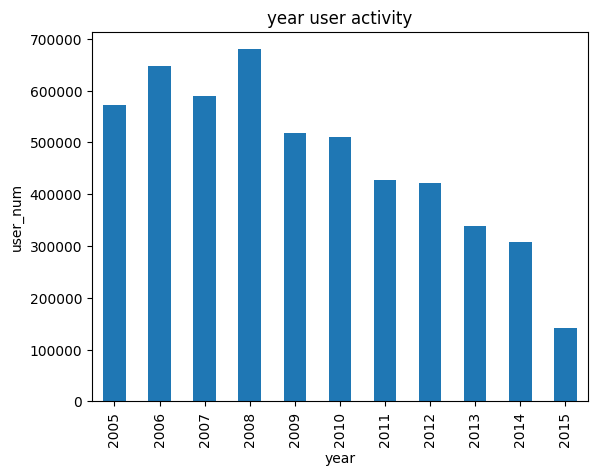

In [13]:
year_activity = train_rating_check.groupby('user_year')['user'].count()
year_activity.plot(kind='bar', title='year user activity')
plt.xlabel('year')
plt.ylabel('user_num')
plt.show()

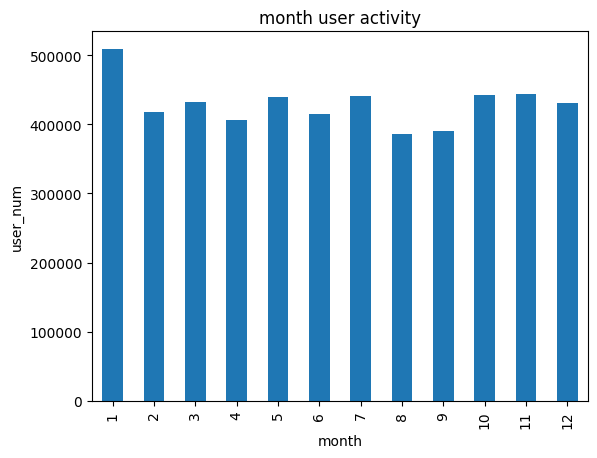

In [14]:
month_activity = train_rating_check.groupby('user_month')['user'].count()
month_activity.plot(kind='bar', title='month user activity')
plt.xlabel('month')
plt.ylabel('user_num')
plt.show()

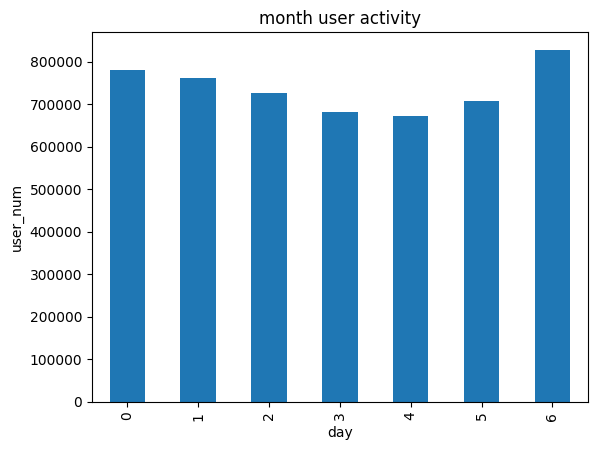

In [15]:
day_activity = train_rating_check.groupby('user_day_of_week')['user'].count()
day_activity.plot(kind='bar', title='month user activity')
plt.xlabel('day')
plt.ylabel('user_num')
plt.show()

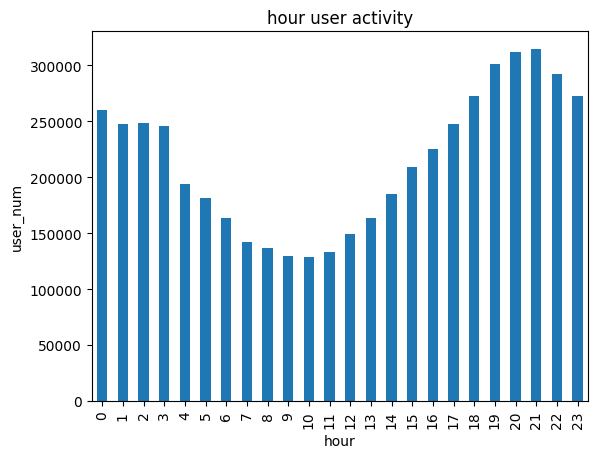

In [16]:
hour_activity = train_rating_check.groupby('user_hour')['user'].count()
hour_activity.plot(kind='bar', title='hour user activity')
plt.xlabel('hour')
plt.ylabel('user_num')
plt.show()

In [17]:
# Data sparsity ratio
print(1 - len(train_rating) / (num_train_users * num_train_items))

0.9758536052697853


In [18]:
print(train_rating.duplicated().sum())
print(train_rating['time'].duplicated().sum())

0
79498


In [19]:
train_rating_check['time_diff'] = train_rating_check.groupby('user')['timestamp'].diff().dt.total_seconds()
user_time = train_rating_check.groupby('user')['time_diff'].agg(['mean', 'std', 'min', 'max'])
print(user_time.head())

              mean           std  min         max
user                                             
11    1.707030e+05  2.480495e+06  0.0  43624889.0
14    6.594413e+01  2.253215e+02  2.0      2433.0
18    1.155960e+06  3.952554e+06  3.0  22989763.0
25    3.204444e+01  7.956623e+01  2.0       513.0
31    2.414379e+01  3.912319e+01  2.0       220.0


### year

In [20]:
print(year.info())
print("*****************************************************************")
print(year.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB
None
*****************************************************************
    item  year
0   1348  1922
1  44587  1922
2   4768  1922
3   8235  1923
4   8609  1923


In [21]:
print("unique한 item 개수: ", year['item'].nunique())
print("unique한 year 개수: ", year['year'].nunique())
print("max year: ", year['year'].max())
print("min year: ", year['year'].min())
print("*******************************************************")
print(year['year'].describe())

unique한 item 개수:  6799
unique한 year 개수:  93
max year:  2014
min year:  1922
*******************************************************
count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64


### writer

In [22]:
print(writer.info())
print("*****************************************************************")
print(writer.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB
None
*****************************************************************
   item     writer
0  1237  nm0000005
1  5147  nm0000005
2  7327  nm0000005
3  2068  nm0000005
4  7396  nm0000005


In [23]:
print("unique한 item 개수: ", writer['item'].nunique())
print("unique한 writer 개수: ", writer['writer'].nunique())

unique한 item 개수:  5648
unique한 writer 개수:  2989


### title

In [24]:
print(title.info())
print("*****************************************************************")
print(title.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB
None
*****************************************************************
   item                             title
0   318  Shawshank Redemption, The (1994)
1  2571                Matrix, The (1999)
2  2959                 Fight Club (1999)
3   296               Pulp Fiction (1994)
4   356               Forrest Gump (1994)


In [25]:
print("unique한 item 개수: ", title['item'].nunique())
print("unique한 title 개수: ", title['title'].nunique())

unique한 item 개수:  6807
unique한 title 개수:  6806


In [26]:
duplicates = title.groupby('title')['item'].nunique()
duplicates = duplicates[duplicates > 1]
print(duplicates)

title
War of the Worlds (2005)    2
Name: item, dtype: int64


In [27]:
check_title = "War of the Worlds (2005)"
items_for_target = title[title['title'] == check_title]['item'].unique()
print(items_for_target)

[34048 64997]


### genre

In [28]:
print(genre.info())
print("*****************************************************************")
print(genre.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB
None
*****************************************************************
   item     genre
0   318     Crime
1   318     Drama
2  2571    Action
3  2571    Sci-Fi
4  2571  Thriller


In [29]:
print("unique한 item 개수: ", genre['item'].nunique())
print("unique한 genre 개수: ", genre['genre'].nunique())
print(genre['genre'].unique())

unique한 item 개수:  6807
unique한 genre 개수:  18
['Crime' 'Drama' 'Action' 'Sci-Fi' 'Thriller' 'Comedy' 'Romance' 'War'
 'Adventure' 'Fantasy' 'Horror' 'Mystery' 'Animation' 'Children'
 'Film-Noir' 'Musical' 'Western' 'Documentary']


### director

In [30]:
print(director.info())
print("*****************************************************************")
print(director.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB
None
*****************************************************************
   item   director
0  1237  nm0000005
1  5147  nm0000005
2  7327  nm0000005
3  2068  nm0000005
4  7396  nm0000005


In [31]:
print("unique한 item 개수: ", director['item'].nunique())
print("unique한 director 개수: ", director['director'].nunique())

unique한 item 개수:  5503
unique한 director 개수:  1340


### Ml_item2attribute

In [32]:
print(Ml_item2attribute.info())
print("*****************************************************************")
print(Ml_item2attribute.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 1 to 119145
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6807 non-null   int64  
 1   1       5051 non-null   float64
 2   2       2771 non-null   float64
 3   3       985 non-null    float64
 4   4       259 non-null    float64
 5   5       47 non-null     float64
 6   6       9 non-null      float64
 7   7       2 non-null      float64
 8   8       1 non-null      float64
 9   9       1 non-null      float64
dtypes: float64(9), int64(1)
memory usage: 585.0+ KB
None
*****************************************************************
   0     1     2    3    4   5   6   7   8   9
1  8  12.0  13.0  5.0  9.0 NaN NaN NaN NaN NaN
2  8  13.0   9.0  NaN  NaN NaN NaN NaN NaN NaN
3  5   6.0   NaN  NaN  NaN NaN NaN NaN NaN NaN
4  5   1.0   6.0  NaN  NaN NaN NaN NaN NaN NaN
5  5   NaN   NaN  NaN  NaN NaN NaN NaN NaN NaN


In [33]:
df1 = pd.merge(train_rating, title, on='item', how='left')
df2 = pd.merge(df1, year, on='item', how='left')
genrelist = genre.groupby('item')['genre'].apply(list)
df3 = pd.merge(df2, genrelist, on='item', how='left')
df4 = pd.merge(df3, director, on='item', how='left')
df = pd.merge(df4, writer, on='item', how='left')

In [34]:
df.isnull().sum()

user             0
item             0
time             0
title            0
year          2592
genre            0
director    463626
writer      317702
dtype: int64

In [35]:
print(df.info())
print("************************************")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915518 entries, 0 to 14915517
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      int64  
 1   item      int64  
 2   time      int64  
 3   title     object 
 4   year      float64
 5   genre     object 
 6   director  object 
 7   writer    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 910.4+ MB
None
************************************
   user  item        time                      title    year  \
0    11  4643  1230782529  Planet of the Apes (2001)  2001.0   
1    11  4643  1230782529  Planet of the Apes (2001)  2001.0   
2    11  4643  1230782529  Planet of the Apes (2001)  2001.0   
3    11  4643  1230782529  Planet of the Apes (2001)  2001.0   
4    11   170  1230782534             Hackers (1995)  1995.0   

                                  genre   director     writer  
0    [Action, Adventure, Drama, Sci-Fi]  nm0000318  nm0099541  
1    [Action, Adventure, Drama, Sci-F

In [36]:
print("unique한 director: ", df['director'].nunique())
print("unique한 writer: ", df['writer'].nunique())
print("unique한 title: ", df['title'].nunique())
print("unique한 year: ", df['year'].nunique())
print("unique한 year 출력: ", np.sort(df['year'].unique()))
all_genres_set = set([genre for sublist in df['genre'] for genre in sublist])
print("unique한 genre: ", all_genres_set)


unique한 director:  1340
unique한 writer:  2989
unique한 title:  6806
unique한 year:  93
unique한 year 출력:  [1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933.
 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945.
 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.   nan]
unique한 genre:  {'Crime', 'Musical', 'Horror', 'Film-Noir', 'Fantasy', 'Romance', 'Drama', 'Children', 'Sci-Fi', 'Animation', 'Mystery', 'Action', 'Comedy', 'Thriller', 'Adventure', 'War', 'Documentary', 'Western'}


In [37]:
df_filtered = df.dropna(subset=['year'])
df_filtered['title_year'] = df_filtered['title'].str.extract(r'\((\d{4})\)').astype(float)
df_filtered['year_match'] = df_filtered['title_year'] == df_filtered['year']
df_filtered['year_sub'] = df_filtered['title_year'] - df_filtered['year']

false_data = df_filtered[df_filtered['year_match'] == False]
print(df_filtered['year_match'].value_counts())
print(false_data[['year_match', 'year_sub', 'title', 'year']])

/tmp/ipykernel_347570/462003305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['title_year'] = df_filtered['title'].str.extract(r'\((\d{4})\)').astype(float)
/tmp/ipykernel_347570/462003305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_match'] = df_filtered['title_year'] == df_filtered['year']
/tmp/ipykernel_347570/462003305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

year_match
True     14912721
False         205
Name: count, dtype: int64
          year_match  year_sub                         title    year
60418          False       NaN  Big Bang Theory, The (2007-)  2007.0
81006          False       NaN  Big Bang Theory, The (2007-)  2007.0
90481          False       NaN     Fawlty Towers (1975-1979)  1975.0
95956          False       NaN     Fawlty Towers (1975-1979)  1975.0
176272         False       NaN  Big Bang Theory, The (2007-)  2007.0
...              ...       ...                           ...     ...
14722697       False       NaN     Fawlty Towers (1975-1979)  1975.0
14777476       False       NaN     Fawlty Towers (1975-1979)  1975.0
14786471       False       NaN  Big Bang Theory, The (2007-)  2007.0
14868312       False       NaN     Fawlty Towers (1975-1979)  1975.0
14875678       False       NaN     Fawlty Towers (1975-1979)  1975.0

[205 rows x 4 columns]


In [38]:
df_filtered = df.dropna(subset=['year'])
df_filtered['title_year'] = df_filtered['title'].str.extract(r'\((\d{4})[-\d]*\)').astype(float)
df_filtered['year_match'] = df_filtered['title_year'] == df_filtered['year']
print(df_filtered['year_match'].value_counts())

year_match
True    14912926
Name: count, dtype: int64


/tmp/ipykernel_347570/3669185918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['title_year'] = df_filtered['title'].str.extract(r'\((\d{4})[-\d]*\)').astype(float)
/tmp/ipykernel_347570/3669185918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_match'] = df_filtered['title_year'] == df_filtered['year']


In [39]:
df_filtered['year_sub'] = df_filtered['title_year'] - df_filtered['year']
print(df_filtered['year_sub'].value_counts())

year_sub
0.0    14912926
Name: count, dtype: int64


/tmp/ipykernel_347570/2580316501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_sub'] = df_filtered['title_year'] - df_filtered['year']


In [40]:
df_filtered['has_year_pattern'] = df_filtered['title'].str.contains(r'\(\d{4}\)', regex=True) | \
                                  df_filtered['title'].str.contains(r'\(\d{4}-\d{4}\)', regex=True) | \
                                  df_filtered['title'].str.contains(r'\(\d{4}-\)', regex=True)
                                  
print(df_filtered['has_year_pattern'].value_counts())

has_year_pattern
True    14912926
Name: count, dtype: int64


/tmp/ipykernel_347570/2612427621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['has_year_pattern'] = df_filtered['title'].str.contains(r'\(\d{4}\)', regex=True) | \


In [41]:
user_dt = train_rating.copy()
user_dt['timestamp'] = pd.to_datetime(user_dt['time'], unit='s')
user_dt['user_year'] = user_dt['timestamp'].dt.year
user_dt['user_month'] = user_dt['timestamp'].dt.month
user_dt['user_day_of_week'] = user_dt['timestamp'].dt.dayofweek
user_dt['user_hour'] = user_dt['timestamp'].dt.hour

df_1 = pd.merge(user_dt, title, on='item', how='left')
df_2 = pd.merge(df_1, year, on='item', how='left')
genre_list = genre.groupby('item')['genre'].apply(list)
df_3 = pd.merge(df_2, genre_list, on='item', how='left')
df_4 = pd.merge(df_3, director, on='item', how='left')
df_final = pd.merge(df_4, writer, on='item', how='left')

In [42]:
print(df_final.head())

   user  item        time           timestamp  user_year  user_month  \
0    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
1    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
2    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
3    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
4    11   170  1230782534 2009-01-01 04:02:14       2009           1   

   user_day_of_week  user_hour                      title    year  \
0                 3          4  Planet of the Apes (2001)  2001.0   
1                 3          4  Planet of the Apes (2001)  2001.0   
2                 3          4  Planet of the Apes (2001)  2001.0   
3                 3          4  Planet of the Apes (2001)  2001.0   
4                 3          4             Hackers (1995)  1995.0   

                                  genre   director     writer  
0    [Action, Adventure, Drama, Sci-Fi]  nm0000318  nm0099541  
1    [Action, Adventure,

In [43]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915518 entries, 0 to 14915517
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user              int64         
 1   item              int64         
 2   time              int64         
 3   timestamp         datetime64[ns]
 4   user_year         int32         
 5   user_month        int32         
 6   user_day_of_week  int32         
 7   user_hour         int32         
 8   title             object        
 9   year              float64       
 10  genre             object        
 11  director          object        
 12  writer            object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3), object(4)
memory usage: 1.2+ GB
None


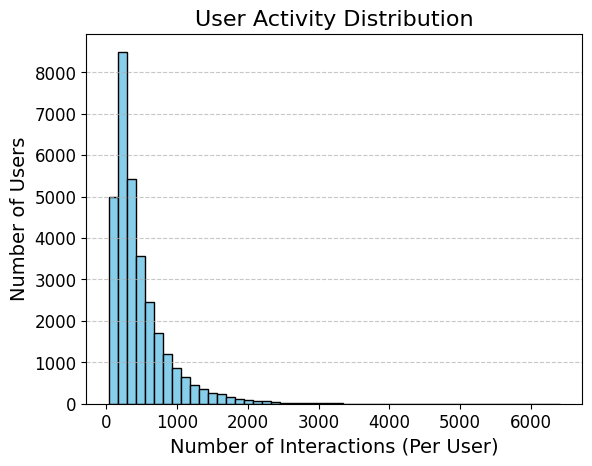

In [44]:
df_final['user'].value_counts().plot(
    kind='hist',
    bins=50,
    color='skyblue',
    edgecolor='black',
    title='User Activity Distribution'
)

plt.title('User Activity Distribution', fontsize=16)
plt.xlabel('Number of Interactions (Per User)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

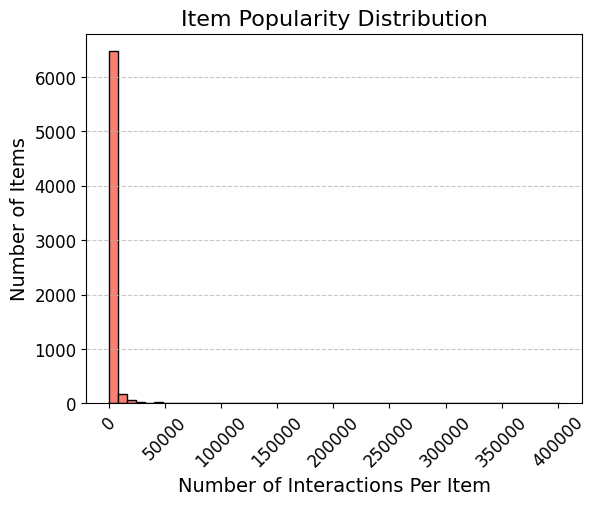

In [45]:
df_final['item'].value_counts().plot(
    kind='hist',
    bins=50,
    color='salmon',
    edgecolor='black',
    title='Item Popularity Distribution'
)

plt.title('Item Popularity Distribution', fontsize=16)
plt.xlabel('Number of Interactions Per Item', fontsize=14)
plt.ylabel('Number of Items', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [46]:
print(df_final.head())

   user  item        time           timestamp  user_year  user_month  \
0    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
1    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
2    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
3    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
4    11   170  1230782534 2009-01-01 04:02:14       2009           1   

   user_day_of_week  user_hour                      title    year  \
0                 3          4  Planet of the Apes (2001)  2001.0   
1                 3          4  Planet of the Apes (2001)  2001.0   
2                 3          4  Planet of the Apes (2001)  2001.0   
3                 3          4  Planet of the Apes (2001)  2001.0   
4                 3          4             Hackers (1995)  1995.0   

                                  genre   director     writer  
0    [Action, Adventure, Drama, Sci-Fi]  nm0000318  nm0099541  
1    [Action, Adventure,

In [47]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915518 entries, 0 to 14915517
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user              int64         
 1   item              int64         
 2   time              int64         
 3   timestamp         datetime64[ns]
 4   user_year         int32         
 5   user_month        int32         
 6   user_day_of_week  int32         
 7   user_hour         int32         
 8   title             object        
 9   year              float64       
 10  genre             object        
 11  director          object        
 12  writer            object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3), object(4)
memory usage: 1.2+ GB
None


In [48]:
print(df_final.isnull().sum())

user                     0
item                     0
time                     0
timestamp                0
user_year                0
user_month               0
user_day_of_week         0
user_hour                0
title                    0
year                  2592
genre                    0
director            463626
writer              317702
dtype: int64


In [49]:
df_final['check'] = df_final['user_year'] - df_final['year']
non_p = df_final[df_final['check'] < 0]
print(non_p.shape[0])
df_final.drop(columns=['check'], inplace=True)

6


In [50]:
df_final['extract_year'] = df_final['title'].str.extract(r'\((\d{4})')[0]
df_final['year'] = df_final['year'].fillna(df_final['extract_year'].astype('float64'))
df_final.drop(columns=['extract_year'], inplace=True)
df_final['year'] = df_final['year'].astype('int32')

In [51]:
print(df_final.isnull().sum())

user                     0
item                     0
time                     0
timestamp                0
user_year                0
user_month               0
user_day_of_week         0
user_hour                0
title                    0
year                     0
genre                    0
director            463626
writer              317702
dtype: int64


In [52]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915518 entries, 0 to 14915517
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user              int64         
 1   item              int64         
 2   time              int64         
 3   timestamp         datetime64[ns]
 4   user_year         int32         
 5   user_month        int32         
 6   user_day_of_week  int32         
 7   user_hour         int32         
 8   title             object        
 9   year              int32         
 10  genre             object        
 11  director          object        
 12  writer            object        
dtypes: datetime64[ns](1), int32(5), int64(3), object(4)
memory usage: 1.2+ GB
None


In [53]:
df_final['item_year'] = df_final['user_year'] - df_final['year']
print(df_final.head())

   user  item        time           timestamp  user_year  user_month  \
0    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
1    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
2    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
3    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
4    11   170  1230782534 2009-01-01 04:02:14       2009           1   

   user_day_of_week  user_hour                      title  year  \
0                 3          4  Planet of the Apes (2001)  2001   
1                 3          4  Planet of the Apes (2001)  2001   
2                 3          4  Planet of the Apes (2001)  2001   
3                 3          4  Planet of the Apes (2001)  2001   
4                 3          4             Hackers (1995)  1995   

                                  genre   director     writer  item_year  
0    [Action, Adventure, Drama, Sci-Fi]  nm0000318  nm0099541          8  
1    [Action, 

In [54]:
is_positive = (df_final['item_year'] >= 0).all()
print(is_positive)

False


In [55]:
non_positive_values = df_final[df_final['item_year'] < 0]
print(non_positive_values.shape[0])
print(non_positive_values.head())

10
          user    item        time           timestamp  user_year  user_month  \
6942493  63880  119145  1419022975 2014-12-19 21:02:55       2014          12   
6942494  63880  119145  1419022975 2014-12-19 21:02:55       2014          12   
6942495  63880  119145  1419022975 2014-12-19 21:02:55       2014          12   
6942496  63880  119145  1419022975 2014-12-19 21:02:55       2014          12   
8855568  81663   91535  1323223207 2011-12-07 02:00:07       2011          12   

         user_day_of_week  user_hour                                title  \
6942493                 4         21  Kingsman: The Secret Service (2015)   
6942494                 4         21  Kingsman: The Secret Service (2015)   
6942495                 4         21  Kingsman: The Secret Service (2015)   
6942496                 4         21  Kingsman: The Secret Service (2015)   
8855568                 2          2            Bourne Legacy, The (2012)   

         year                                 g

In [56]:
print(df_final['item_year'].unique())

[  8  14  16  39  27  10  29  11  12  22   1   9  13  49   5   2   7   4
  15  18  21  58  30  23  17  25  28   6   3  24  20  19  67  32  26  34
  38  68  45   0  41  47  64  31  46  69  52  55  61  43  83  36  35  56
  33  70  62  40  75  50  42  54  81  71  53  37  48  65  66  60  44  72
  51  89  90  85  57  84  73  63  59  74  80  79  78  76  77  87  88  82
  86  92  93  91  97 109  94 112 113 110 108  95  96 107  98 111  99 100
  -1]


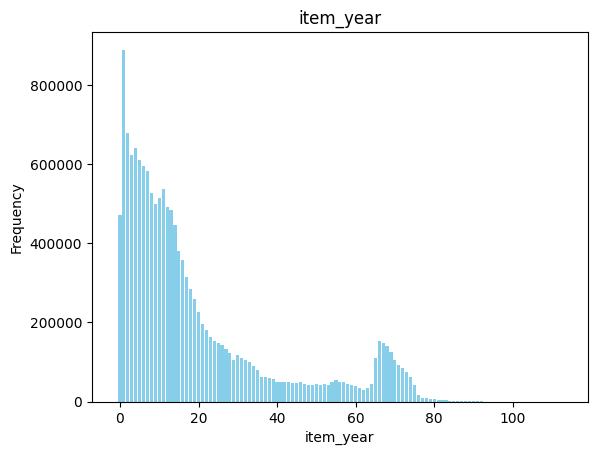

In [57]:
item_year_distribution = df_final['item_year'].value_counts().sort_index()

plt.bar(item_year_distribution.index, item_year_distribution.values, color='skyblue')
plt.xlabel('item_year')
plt.ylabel('Frequency')
plt.title('item_year')
plt.show()

/tmp/ipykernel_347570/3341037854.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


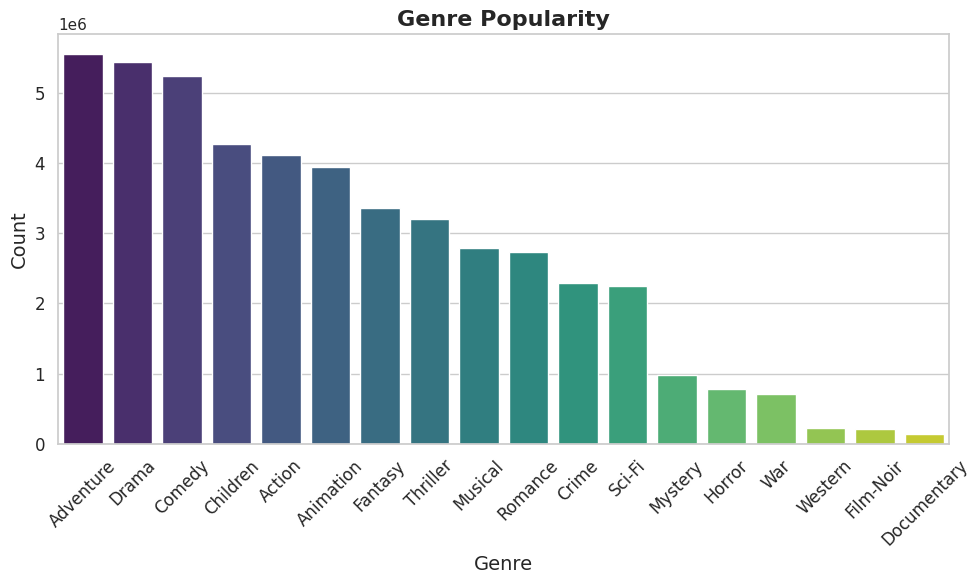

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

all_genres = [genre for sublist in df['genre'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Genre Popularity", fontsize=16, fontweight='bold')
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

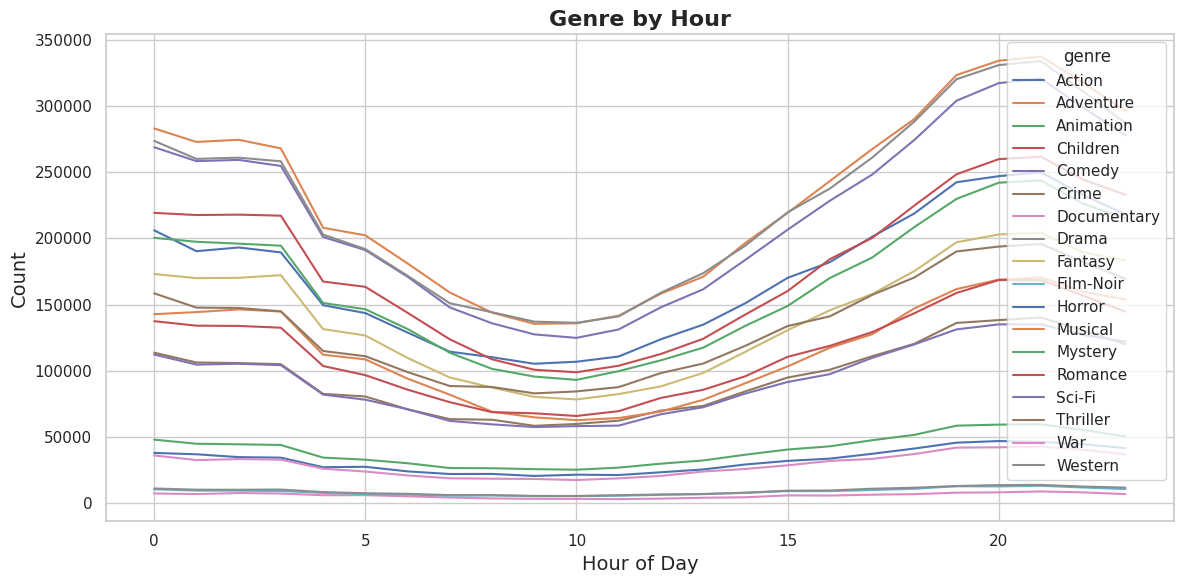

In [59]:
expanded_df = df_final.explode('genre')

genre_hour = expanded_df.groupby(['user_hour', 'genre']).size().unstack()

genre_hour.plot(kind='line', title='Genre by Hour', figsize=(12, 6))

plt.title('Genre by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

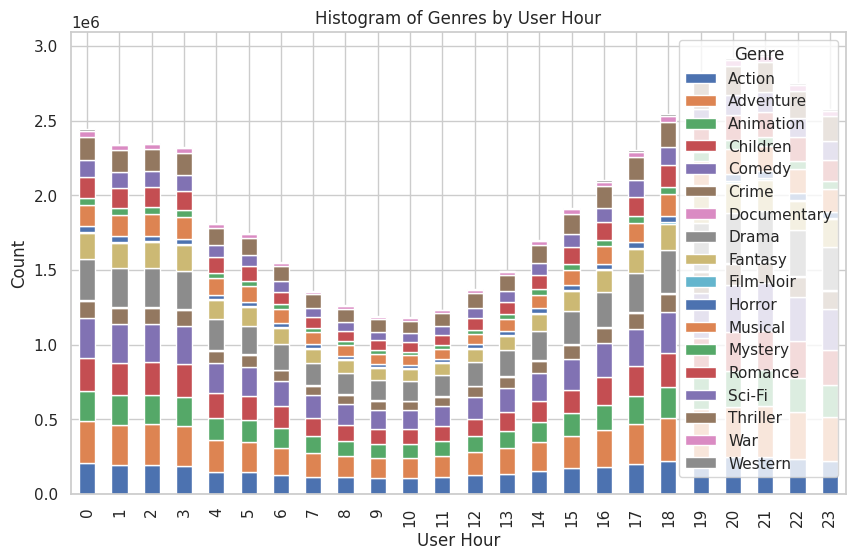

In [60]:
expanded_df = df_final.explode('genre')

genre_hour = expanded_df.groupby(["user_hour", "genre"]).size().unstack(fill_value=0)

genre_hour.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Histogram of Genres by User Hour")
plt.xlabel("User Hour")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()

In [61]:
expanded_df = df_final.explode('genre')

count_docu = expanded_df.loc[expanded_df['genre'] == 'Documentary', 'item'].nunique()
count_users_docu = expanded_df.loc[expanded_df['genre'] == 'Documentary', 'user'].nunique()

print(count_docu)
print(count_users_docu)

323
18456


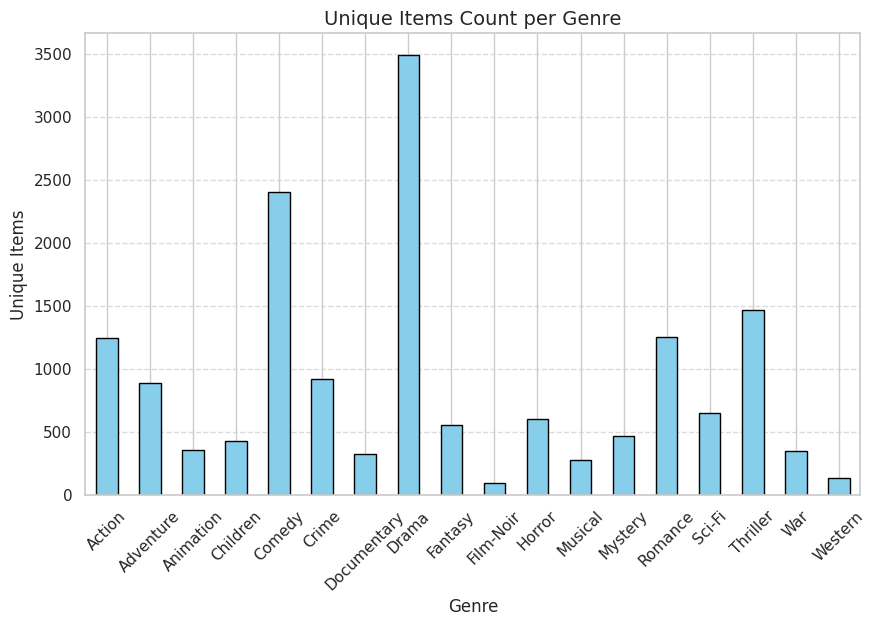

In [62]:
expanded_df = df_final.explode('genre')

unique_items_per_genre = expanded_df.groupby("genre")["item"].nunique()

plt.figure(figsize=(10, 6))
unique_items_per_genre.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Unique Items Count per Genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Unique Items", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

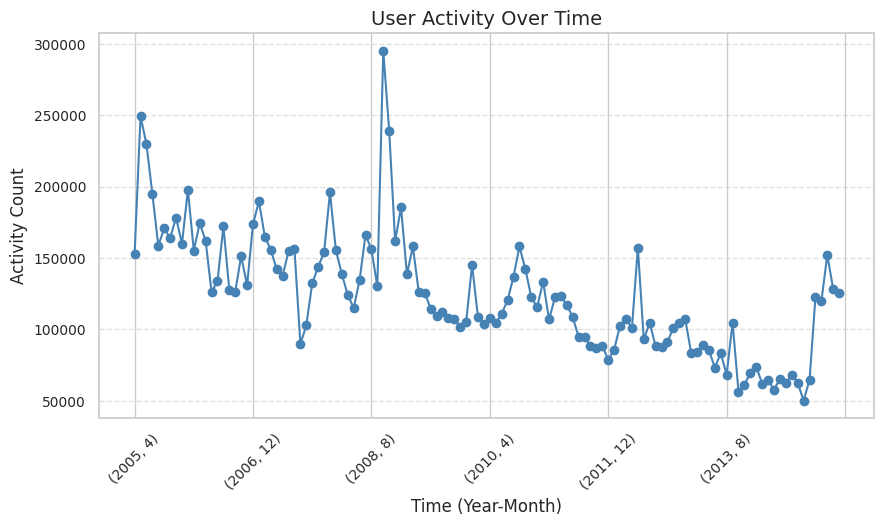

In [63]:
user_trend = df_final.groupby(['user_year', 'user_month']).size()

plt.figure(figsize=(10, 5))
user_trend.plot(marker='o', color='steelblue', linewidth=1.5)

plt.title("User Activity Over Time", fontsize=14)
plt.xlabel("Time (Year-Month)", fontsize=12)
plt.ylabel("Activity Count", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [64]:
genre_list = genre.groupby('item')['genre'].apply(list)
print(genre_list)

item
1         [Adventure, Animation, Children, Comedy, Fantasy]
2                            [Adventure, Children, Fantasy]
3                                         [Comedy, Romance]
4                                  [Comedy, Drama, Romance]
5                                                  [Comedy]
                                ...                        
118700                                              [Drama]
118900                                              [Drama]
118997                 [Children, Comedy, Fantasy, Musical]
119141                                     [Action, Comedy]
119145                   [Action, Adventure, Comedy, Crime]
Name: genre, Length: 6807, dtype: object


<Axes: title={'center': 'Recent Genre Trends (2014~~)'}, xlabel='genre'>

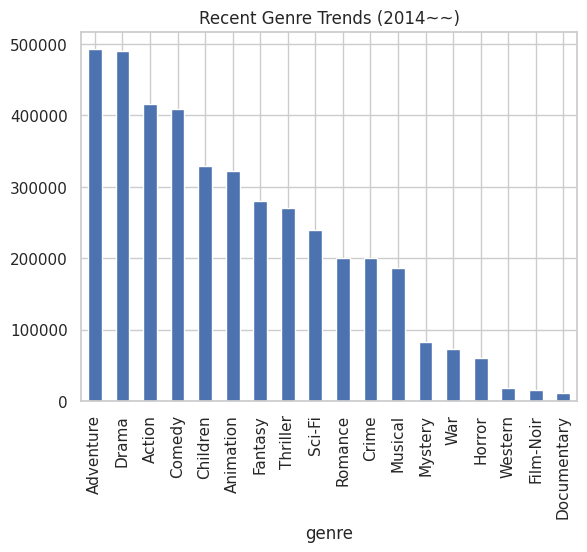

In [65]:
recent_data = df_final[df_final['timestamp'] > '2014-01-01']
recent_trends = recent_data['genre'].explode().value_counts()
recent_trends.plot(kind='bar', title='Recent Genre Trends (2014~~)')

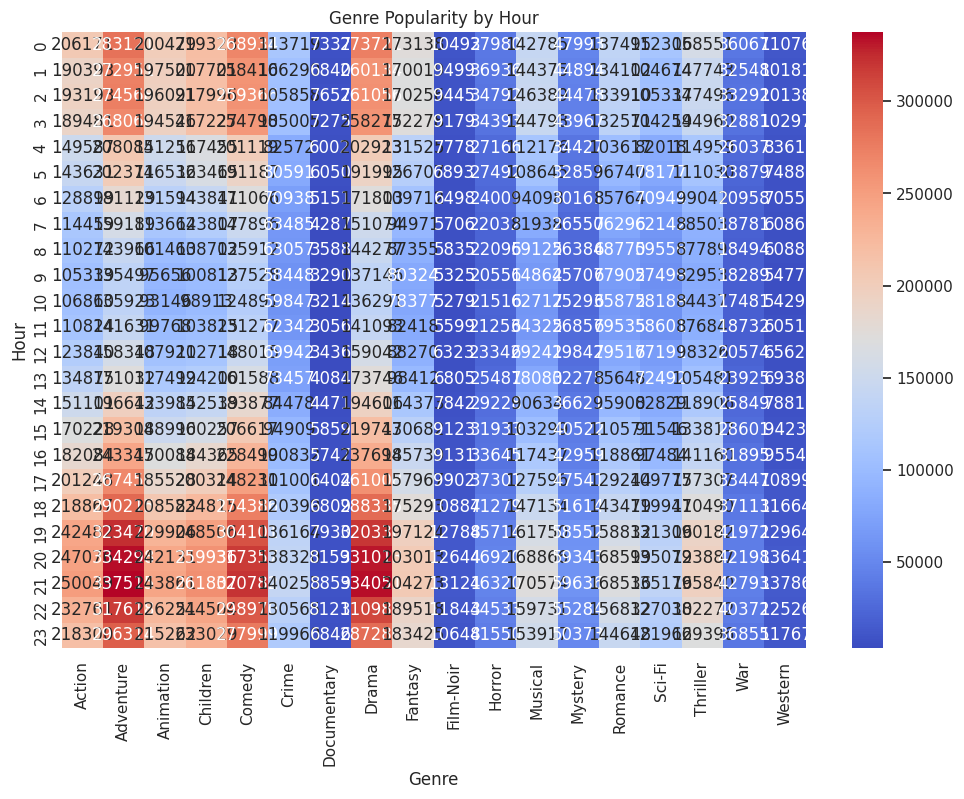

In [68]:
hour_genre = df_final.explode('genre').groupby('user_hour')['genre'].value_counts().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(hour_genre, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Genre Popularity by Hour')
plt.xlabel('Genre')
plt.ylabel('Hour')
plt.show()

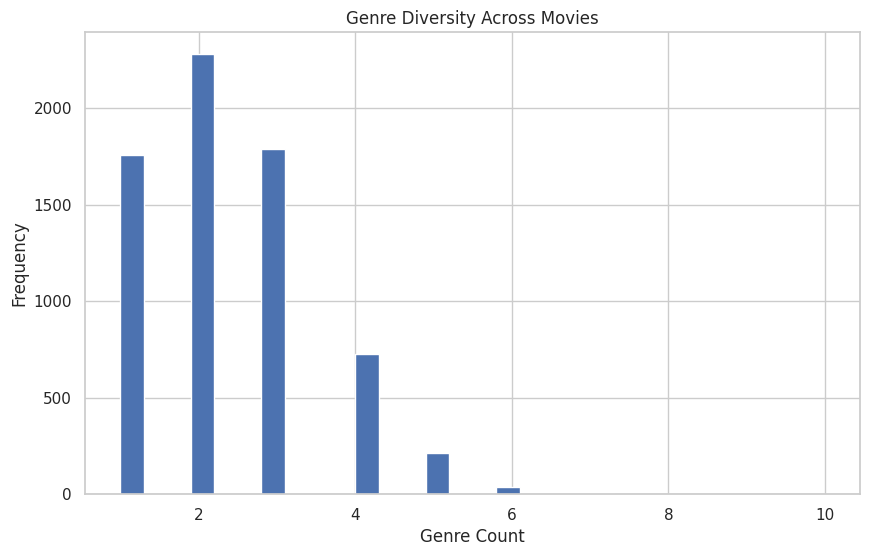

In [70]:
genre_gen = df_final.copy()
genre_gen['genre_count'] = genre_gen['genre'].apply(len)
genre_diversity = genre_gen.groupby('title')['genre_count'].mean()
genre_diversity.hist(bins=30, figsize=(10, 6))

plt.title('Genre Diversity Across Movies')
plt.xlabel('Genre Count')
plt.ylabel('Frequency')
plt.show()

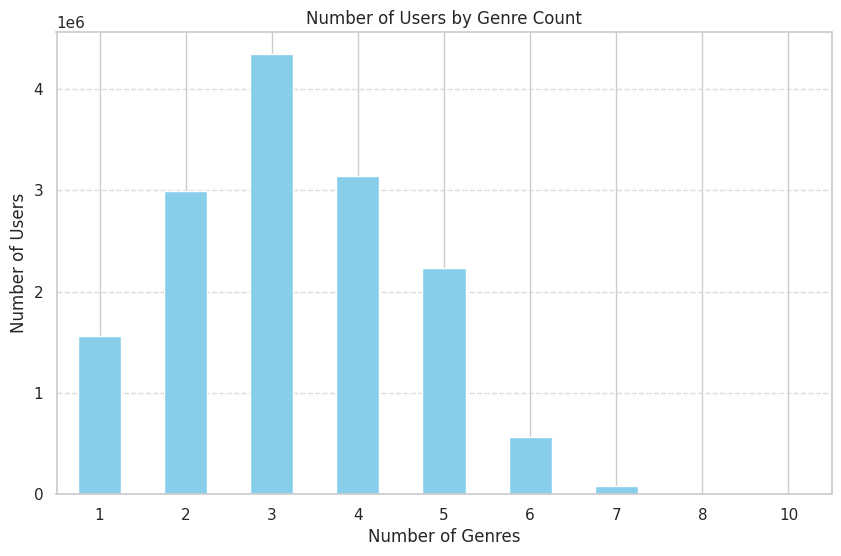

In [71]:
genre_count_distribution = genre_gen.groupby('genre_count').size()

plt.figure(figsize=(10, 6))
genre_count_distribution.plot(kind='bar', color='skyblue')
plt.title('Number of Users by Genre Count')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: title={'center': 'Top 10 Most Popular Movies'}, xlabel='title'>

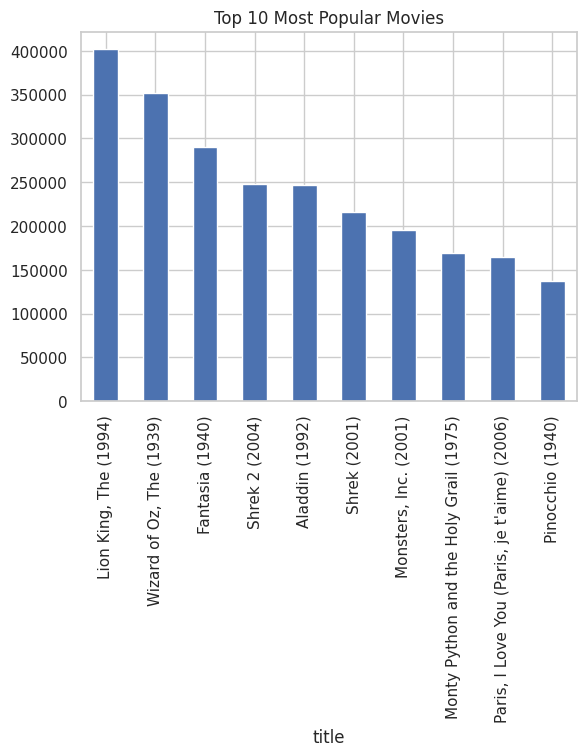

In [72]:
top_movies = df['title'].value_counts().head(10)
top_movies.plot(kind='bar', title='Top 10 Most Popular Movies')